# **Introduction**

In [74]:
import numpy as np
from provided_functions import cost_fn, L1LossRegression
from scipy.optimize import minimize
import matplotlib.pyplot as plt

data = np.load('onedim_data.npy', allow_pickle = True).item()

In [ ]:
list(data)

X_test = list(data.values())[0]
X_train = list(data.values())[1]
Y_train = list(data.values())[2]
Y_test = list(data.values())[3]

# **Part a)**

In [ ]:
def LeastSquares(X, Y):
    '''
    solves linear regression with L2 Loss

    X: design matrix n x d
    Y: true values n x 1

    output: weight of linear regression d x 1
    '''

    lmbd_reg = 0

    w = minimize(cost_L2, np.zeros(X.shape[1]), args=(X, Y, lmbd_reg)).x
    return np.expand_dims(w, 1)


def RidgeRegression(X, Y, lmbd_reg=0.):
    ''' 
    solves linear regression with L2 Loss + L2 regularization

    X: design matrix n x d
    Y: true values n x 1
    lmbd_reg: weight regularization

    output: weight of linear regression d x 1
    '''
    
    w = minimize(cost_L2, np.zeros(X.shape[1]), args=(X, Y, lmbd_reg)).x
    return np.expand_dims(w, 1)


def cost_L2(w, x, y, lmbd=0.):
    ''' 
    computes the L2 loss + L2 regularization

    w: weights to estimate d
    x: data points n x d
    y: true values n x 1
    lmbd: weight regularization

    output: loss ||x * w - y||^2_2 + lmbd * ||w||_2^2
    '''

    return ((x @ np.expand_dims(w, 1) - y) ** 2).sum() + lmbd * (w ** 2).sum()

In the following, these formulas are exemplarily evaluated using X = X_train and Y = Y_train (+ lambda = 5 for ridge regression).

**Least Squares**

In [ ]:
LeastSquares(X_train, Y_train)

array([[-0.37476172]])

In [ ]:
np.linalg.solve(np.transpose(X_train) @ X_train, np.transpose(X_train) @ Y_train)

array([[-0.37476172]])

**Ridge Regression**

In [ ]:
RidgeRegression(X_train, Y_train, 5)

array([[-0.36943132]])

In [ ]:
np.linalg.solve(np.transpose(X_train) @ X_train + 5 * np.identity(X_train.shape[1]), np.transpose(X_train) @ Y_train)

array([[-0.36943132]])

Hence, the constructed function returns for both least squares and ridge regression the same output as the respective closed-form matrix solution.

# **Part b)**

In [ ]:
def Basis(X, k):
    '''
    generate the design matrix using the orthogonal Fourier basis functions

    X: input data matrix n x 1
    k: maximal frequency of Fourier basis

    output: design matrix using the Fourier basis functions
    '''

    design_matrix = np.ones((X.shape[0], 2*k+1)) # initialize design matrix
    
    for i in range(0, X.shape[0]):
      for l in range(1, k+1): 
        design_matrix[i, 2*l-1] = np.cos(2*np.pi*l*X[i])
        design_matrix[i, 2*l] = np.sin(2*np.pi*l*X[i])
    return design_matrix

In [ ]:
# exemplary computation with X = X_train and k = 4

Basis(X_train, 4)[0]

array([ 1.        ,  0.22634853,  0.97404638, -0.89753268,  0.44094793,
       -0.63265894, -0.77443054,  0.61112984, -0.79153037])

# **Part c)**

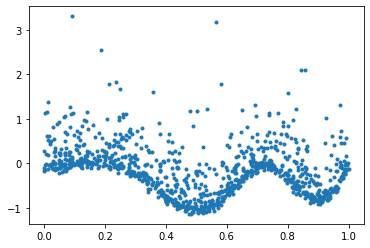

In [ ]:
# plot training data

plt.plot(X_train, Y_train, '.');

The graph suggests a periodic relationship between X_train and Y_train with some (extreme) outliers. For this kind of data, the L1 loss is more appropriate because the L2 loss is highly sensitive to the outliers as it penalizes them even stronger (due to squaring). As this is undesired given the predominant periodic relationship, the pre-defined function *L1LossRegression()* is used which implements linear regression with L1 loss and L2 regularization.

In [66]:
# defining parameters

K = [1, 2, 3, 5, 10, 15, 20]
lmbd = 30

In [67]:
points = np.linspace(0.001, 1.0, num=1000, endpoint=False) # defining 1,000 evenly spaced points between 0 and 1

W = [L1LossRegression(Basis(X_train, k), Y_train, lmbd) for k in K] # compute the weights for varying k
outputs = [Basis(points, K[i]) @ W[i] for i in range(len(K))]  # evaluate the function for varying k

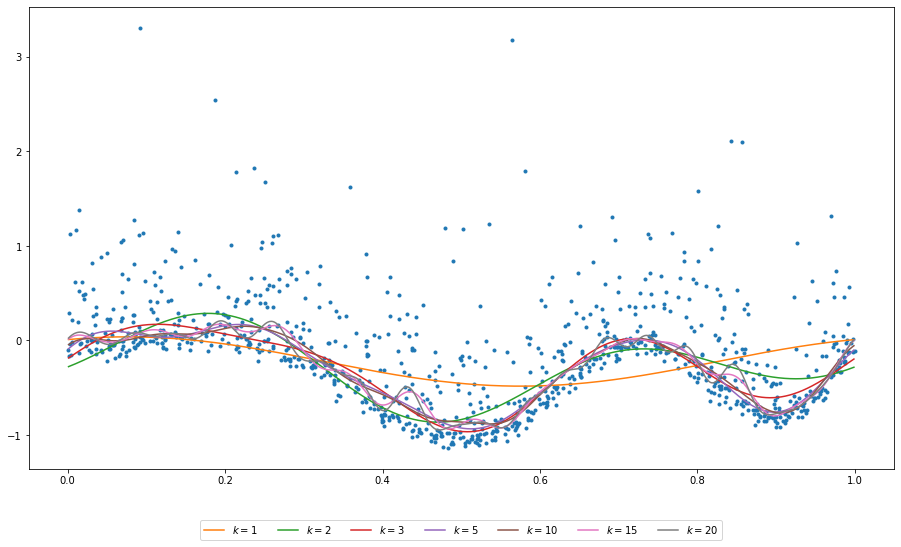

In [68]:
# plot the resulting functions for varying k with the training data

fig = plt.figure()
ax = plt.subplot(111)
fig.set_size_inches(15.5, 8.5)

plt.plot(X_train, Y_train, '.');
for i in range(len(outputs)):     
  line, = ax.plot(points, outputs[i], label='$k = %i$'% K[i])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol = len(outputs))
plt.show()

In [69]:
# calculate the (L1-)loss on the training and test data

loss_training_reg = [np.abs(Y_train - Basis(X_train, K[i]) @ W[i]).sum()*(1/X_train.shape[0]) for i in range(len(K))]
loss_test_reg = [np.abs(Y_test - Basis(X_test, K[i]) @ W[i]).sum()*(1/X_test.shape[0]) for i in range(len(K))]

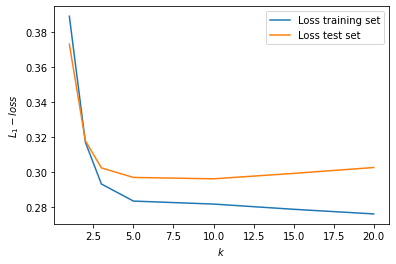

In [73]:
# plot the training and test loss as function of k

fig = plt.figure()
ax = plt.subplot(111)

line, = ax.plot(K, loss_training_reg , label='Loss training set')
line, = ax.plot(K, loss_test_reg , label='Loss test set')

ax.set_xlabel('$k$')
ax.set_ylabel('$L_{1}-loss$')
ax.legend()

plt.show()

**Now, the same steps are repeated for lambda = 0 (unregularized).**

In [71]:
W = [L1LossRegression(Basis(X_train, k), Y_train, 0) for k in K] # compute the weights for varying k
outputs = [Basis(points, K[i]) @ W[i] for i in range(len(K))] # evaluate the function for varying k

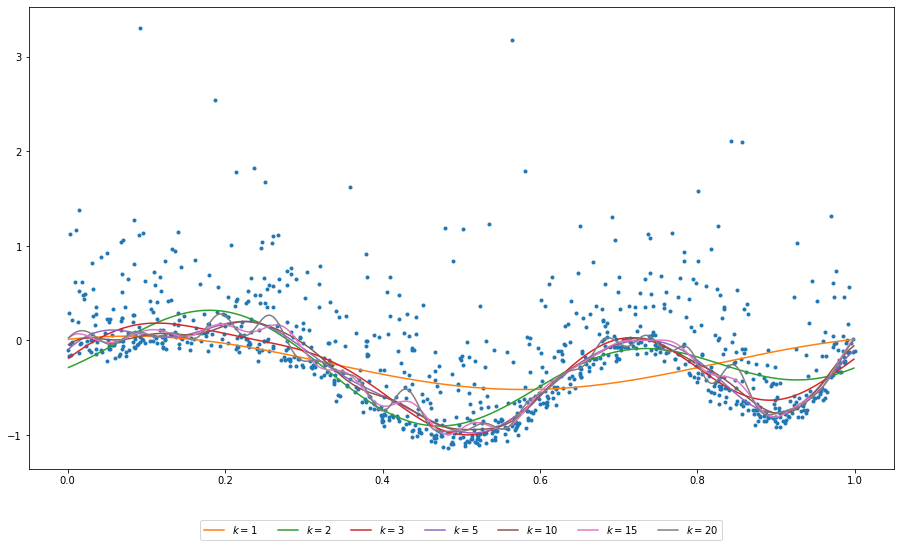

In [72]:
# plot the resulting functions for varying k with the training data

fig = plt.figure()
ax = plt.subplot(111)
fig.set_size_inches(15.5, 8.5)

plt.plot(X_train, Y_train, '.');
for i in range(len(outputs)):     
  line, = ax.plot(points, outputs[i], label='$k = %i$'% K[i])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol = len(outputs))
plt.show()

Here, it can already be observed that the resulting functions are very similar to the regularized variant.

In [ ]:
# calculate the (L1-)loss on the training and test data

loss_training_LS = [np.abs(Y_train - Basis(X_train, K[i]) @ W[i]).sum()*(1/X_train.shape[0]) for i in range(len(K))]
loss_test_LS = [np.abs(Y_test - Basis(X_test, K[i]) @ W[i]).sum()*(1/X_test.shape[0]) for i in range(len(K))]

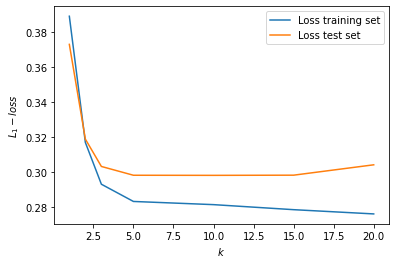

In [ ]:
# plot the training and test loss as function of k

fig = plt.figure()
ax = plt.subplot(111)

line, = ax.plot(K, loss_training_LS , label='Loss training set')
line, = ax.plot(K, loss_test_LS , label='Loss test set')

ax.set_xlabel('$k$')
ax.set_ylabel('$L_{1}-loss$')
ax.legend()

plt.show()

Here, one can see that the training/test loss curves are very similar for lambda = 30 and lambda = 0, however, they are not identical (see exemplarily below). For larger lambda, they would deviate even more.

In [ ]:
[a_i - b_i for a_i, b_i in zip(loss_training_reg, loss_training_LS)]

[0.00023574817456423203,
 0.0004564079632928264,
 0.0004166670983370979,
 0.0005042203274807644,
 0.0006107919431987407,
 0.0005112566414148811,
 0.0002916521564015895]

**How does increasing k affect the estimated functions f_k ? What is the behavior of training and test error for increasing k (explanation on paper)?**

As k increases, the number of features (2k+1) increases and the function is able to model finer relationships in the data. Hence, for least squares regression, the functions will increasingly overfit to training data such that the training loss will go to zero and the test loss will increase.
Ridge regression tries to counteract the overfitting through the regularization parameter lambda. However, as lambda = 30 is relatively small in this case, the functions are still overfitting for larger k. This will continue until the gain in reducing the training loss is outweighted by the larger penalization term. Then, the training and loss functions will ultimately stablize and remain constant as k further increases.


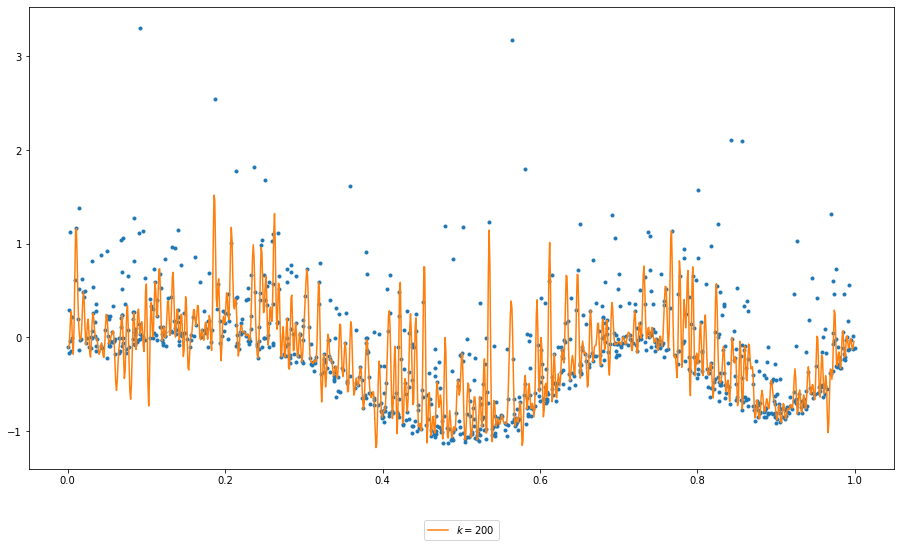

In [56]:
# re-create analysis with k = 200

points = np.linspace(0.001, 1.0, num=1000, endpoint=False)

W = L1LossRegression(Basis(X_train, 200), Y_train, 30)
output = Basis(points, 200) @ W

fig = plt.figure()
ax = plt.subplot(111)
fig.set_size_inches(15.5, 8.5)

plt.plot(X_train, Y_train, '.');
line, = ax.plot(points, output, label='$k = %i$'% 200)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol = len(outputs))
plt.show()

In [59]:
print(np.abs(Y_train - Basis(X_train, 200) @ W).sum()*(1/X_train.shape[0]))
print(np.abs(Y_test - Basis(X_test, 200) @ W).sum()*(1/X_test.shape[0]))

0.2043550486104318
0.4100918012704783


Here, we see how the training (test) error will further increase (decrease) for increasing k when considering least squares regression.

# **Part d)**

Please refer to the PDF for the first bullet point of d) and the derivation of the explicit form of the new basis functions (second bullet point of d)).

In [31]:
def FourierBasisNormalized(X,k):
    '''
    generate the design matrix using the normalized orthogonal Fourier basis functions 
    (as explicitly derived in the PDF)

    X: input data matrix n x 1
    k: maximal frequency of Fourier basis

    output: design matrix using the normalized Fourier basis functions
    '''

    design_matrix = np.ones((X.shape[0], 2*k+1))
    
    for i in range(0, X.shape[0]):
      for l in range(1, k+1): 
        design_matrix[i, 2*l-1] = 1/np.sqrt(2*np.pi**2 * l**2) * np.cos(2*np.pi*l*X[i])
        design_matrix[i, 2*l] = 1/np.sqrt(2*np.pi**2 * l**2) * np.sin(2*np.pi*l*X[i])

    return design_matrix

In [75]:
# exemplarily compare the output of the normalized with the unnormalized basis function for the first observation of X_train and k = 4

print(FourierBasisNormalized(X_train, 4)[0])
print(Basis(X_train, 4)[0])

[ 1.          0.05094632  0.21923746 -0.10100791  0.04962408 -0.0474661
 -0.0581027   0.03438814 -0.04453923]
[ 1.          0.22634853  0.97404638 -0.89753268  0.44094793 -0.63265894
 -0.77443054  0.61112984 -0.79153037]


In [76]:
# compute weights and the output for the evenly spaced lines for the (un)normalized least squares and ridge regression

points = np.linspace(0.001, 1.0, num=1000, endpoint=False)

# least squares regression
W_old_LS = [LeastSquares(Basis(X_train, k), Y_train) for k in K]
output_old_LS = [Basis(points, K[i]) @ W_old_LS[i] for i in range(len(K))] 

W_new_LS = [LeastSquares(FourierBasisNormalized(X_train, k), Y_train) for k in K]
output_new_LS = [FourierBasisNormalized(points, K[i]) @ W_new_LS[i] for i in range(len(K))] 

# ridge regression
W_old_RR = [RidgeRegression(Basis(X_train, k), Y_train, 30) for k in K]
output_old_RR = [Basis(points, K[i]) @ W_old_RR[i] for i in range(len(K))] 

W_new_RR = [RidgeRegression(FourierBasisNormalized(X_train, k), Y_train, 0.5) for k in K]
output_new_RR = [FourierBasisNormalized(points, K[i]) @ W_new_RR[i] for i in range(len(K))] 

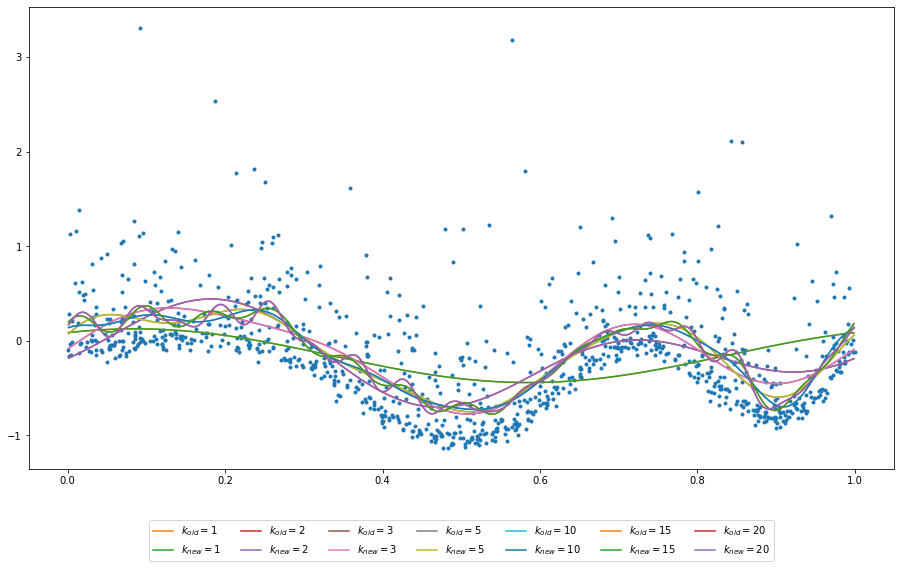

In [77]:
# plot the normalized and unnormalized least squares regression functions for varying k

fig = plt.figure()
ax = plt.subplot(111)
fig.set_size_inches(15.5, 8.5)

plt.plot(X_train, Y_train, '.');
for i in range(len(outputs)):     
  line, = ax.plot(points, output_old_LS[i], label='$k_{old} = %i$'% K[i])
  line, = ax.plot(points, output_new_LS[i], label='$k_{new} = %i$'% K[i])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol = len(outputs))
plt.show()

In [78]:
print(output_old_LS[0][0])
print(output_new_LS[0][0])

[0.08770272]
[0.08770269]



Comparing the least squares result with both the normalized and unnormalized basis function, it can be seen that both produce the same output (disregarding minimal numeric differences). This is by design, since rescaling has no impact on the function as the weights (w) adjust accordingly to new basis (scaling the features is compensated by inversely scaling the weights).


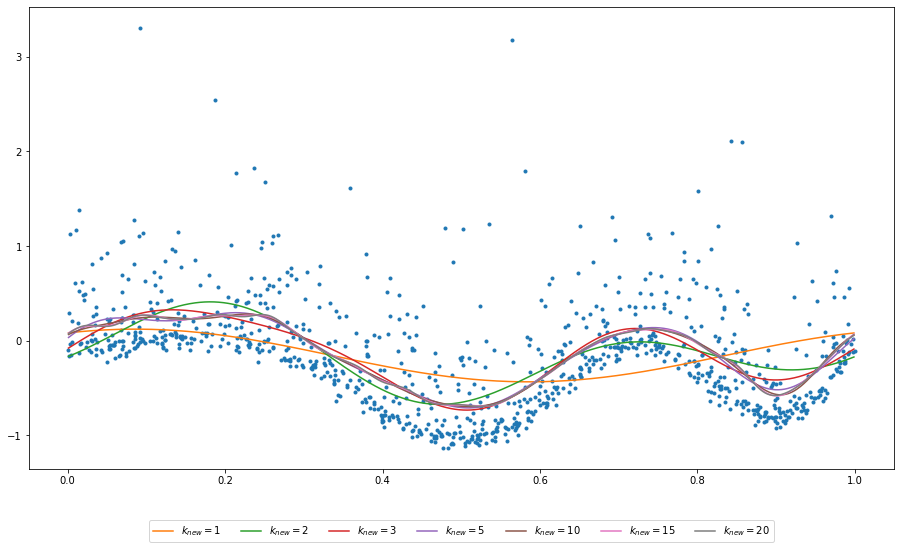

In [79]:
# plot the normalized and unnormalized ridge regression functions for varying k

fig = plt.figure()
ax = plt.subplot(111)
fig.set_size_inches(15.5, 8.5)

plt.plot(X_train, Y_train, '.');
for i in range(len(outputs)):     
  #line, = ax.plot(points, output_old_RR[i], label='$k_{old} = %i$'% K[i])
  line, = ax.plot(points, output_new_RR[i], label='$k_{new} = %i$'% K[i])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol = len(outputs))
plt.show()

In [80]:
print(output_old_RR[0][0])
print(output_new_RR[0][0])

[0.07849668]
[0.08306684]


Here, we can see that the introduction of the normalized basis functions led to a slightly different output / estimated function. This is expected because, different to the least squares regression, the rescaling matters here due to the regularization term. Because of that, the weights are not able to just adjust to the new basis function to produce the same output. This is because the penalization of the weights leads to the fact that the weights cannot be simple upscaled if the features are downscaled (for example) as this will create a different loss.

Also, it can be seen that the functions f_k with the normalized basis functions do not overfit as much to the idiosyncracies for increasing k as the unnormalized variant does.

**Comparison of loss for normalized vs. unnormalized least squares regression**

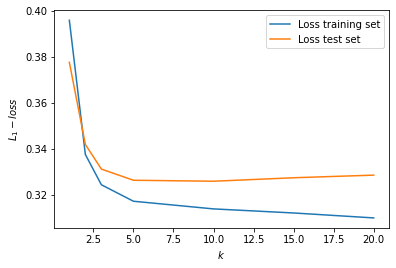

In [81]:
# compute loss for unnormalized least squares regression

loss_training = [np.abs(Y_train - Basis(X_train, K[i]) @ W_old_LS[i]).sum()*(1/X_train.shape[0]) for i in range(len(K))]
loss_test = [np.abs(Y_test - Basis(X_test, K[i]) @ W_old_LS[i]).sum()*(1/X_test.shape[0]) for i in range(len(K))]
fig = plt.figure()
ax = plt.subplot(111)

line, = ax.plot(K, loss_training , label='Loss training set')
line, = ax.plot(K, loss_test , label='Loss test set')

ax.set_xlabel('$k$')
ax.set_ylabel('$L_{1}-loss$')
ax.legend()

plt.show()

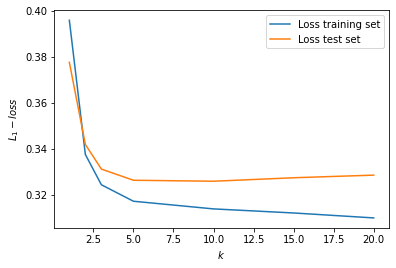

In [82]:
# compute loss for normalized least squares regression

loss_training = [np.abs(Y_train - FourierBasisNormalized(X_train, K[i]) @ W_new_LS[i]).sum()*(1/X_train.shape[0]) for i in range(len(K))]
loss_test = [np.abs(Y_test - FourierBasisNormalized(X_test, K[i]) @ W_new_LS[i]).sum()*(1/X_test.shape[0]) for i in range(len(K))]
fig = plt.figure()
ax = plt.subplot(111)

line, = ax.plot(K, loss_training , label='Loss training set')
line, = ax.plot(K, loss_test , label='Loss test set')

ax.set_xlabel('$k$')
ax.set_ylabel('$L_{1}-loss$')
ax.legend()

plt.show()

As reasoned before, the rescaling with the complexity term eventually not changes the final function. Accordingly, the training and test loss is identical for both the normalized and the unnormalized least squares regression.

**Comparison of loss for normalized vs. unnormalized ridge regression**

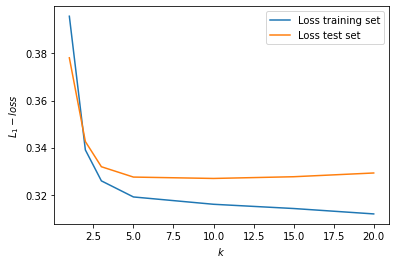

In [83]:
# compute loss for unnormalized ridge regression

loss_training = [np.abs(Y_train - Basis(X_train, K[i]) @ W_old_RR[i]).sum()*(1/X_train.shape[0]) for i in range(len(K))]
loss_test = [np.abs(Y_test - Basis(X_test, K[i]) @ W_old_RR[i]).sum()*(1/X_test.shape[0]) for i in range(len(K))]
fig = plt.figure()
ax = plt.subplot(111)

line, = ax.plot(K, loss_training , label='Loss training set')
line, = ax.plot(K, loss_test , label='Loss test set')

ax.set_xlabel('$k$')
ax.set_ylabel('$L_{1}-loss$')
ax.legend()

plt.show()

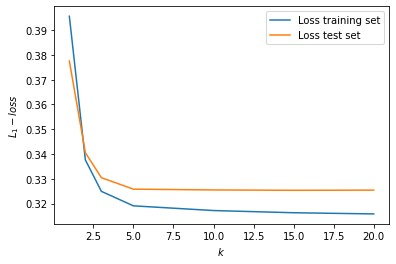

In [84]:
# compute loss for normalized ridge regression

loss_training = [np.abs(Y_train - FourierBasisNormalized(X_train, K[i]) @ W_new_RR[i]).sum()*(1/X_train.shape[0]) for i in range(len(K))]
loss_test = [np.abs(Y_test - FourierBasisNormalized(X_test, K[i]) @ W_new_RR[i]).sum()*(1/X_test.shape[0]) for i in range(len(K))]
fig = plt.figure()
ax = plt.subplot(111)

line, = ax.plot(K, loss_training , label='Loss training set')
line, = ax.plot(K, loss_test , label='Loss test set')

ax.set_xlabel('$k$')
ax.set_ylabel('$L_{1}-loss$')
ax.legend()

plt.show()

Here, it can be seen that the normalization with the complexity measure of the basis function counteracts the overfitting with larger k (see also PDF).


# **Part e)**

For part e), please refer to the PDF.